# Image Concatenation

The purpose of this notebook is to take a folder containing the 50x50 pxl patches and concatenate them together to recreate the whole slide image.

The notebook also contains code to break the image back down into it's 50x50pxl patches for later use in the end product.

In [1]:
# Importing Pillow to handle the concatenation
from PIL import Image, ImageColor

# Importing glob to import the images
from glob import glob

# Importing cv to convert the image paths into images
import cv2

# Importing os to separate and process the image file names
import os

# Importing matplotlib for rendering the images
import matplotlib.pyplot as plt

In [10]:
# Loading in the images of one scan 8863

data = glob('../../data/IDC_regular_ps50_idx5/9037/**/*.png', recursive=True)

### Now that all of the paths and file names are set, the file names will be separated from the paths.

In [12]:
# Separating file name from the path of the file
files = []
for datum in data:
        files.append(os.path.basename(datum))

In [13]:
files[0].split('_')

['9037', 'idx5', 'x1001', 'y1001', 'class0.png']

In [14]:
# removing the .png from the file names and isolating the x, y positions of the images
x = []
y = []
for file in files:
    # isolating the x and y coordinates of the image and converting to int type
    x.append(int(file.split('_')[2].replace('x','')))
    y.append(int(file.split('_')[3].replace('y','')))
    
    # Appending the coordinates to the list of x-y coordinates
    xy = list(zip(x,y))

In [15]:
# check the min location to determine the pixel offset
min(x),min(y)

(51, 1)

In [16]:
max(x)-min(x)

2250

In [17]:
max(y)-min(y)

1400

In [25]:
def concat(slide_number):
    # Loading in the images of one scan 8863
    data = glob('../../data/IDC_regular_ps50_idx5/'+slide_number+'/**/*.png', recursive=True)
    
    # Separating file name from the path of the file
    files = []
    for datum in data:
            files.append(os.path.basename(datum))
    
    # removing the .png from the file names and isolating the x, y positions of the images
    x = []
    y = []
    for file in files:
        # isolating the x and y coordinates of the image and converting to int type
        x.append(int(file.split('_')[2].replace('x','')))
        y.append(int(file.split('_')[3].replace('y','')))
        
        
    # Initialize the full image space
    full_slide = Image.new('RGB',(max(x)-min(x),max(y)-min(y)),color='#f2f2f5')
    
    for datum in data:
        # Isolate the file name
        file = os.path.basename(datum)
        
        # grab the location of the image from the file
        x = int(file.split('_')[2].replace('x',''))
        y = int(file.split('_')[3].replace('y',''))
        case = file.split('_')[-1].replace('.png','')
        
        # Load the image in using the cv library
        img = Image.open(datum)
        
        # paste the image into the image space
        full_slide.paste(img,(x-51,y-51))
        
        # paste the image into the image space
        if case == 'class0': 
            img_neg = Image.new('RGB',(50,50),color="#77c128")
            full_slide.paste(img_neg,(x-51,y-51))
           
        else:
            img_pos = Image.new('RGB',(50,50),color='#dd5866')
            full_slide.paste(img_pos,(x-51,y-51))
    return full_slide

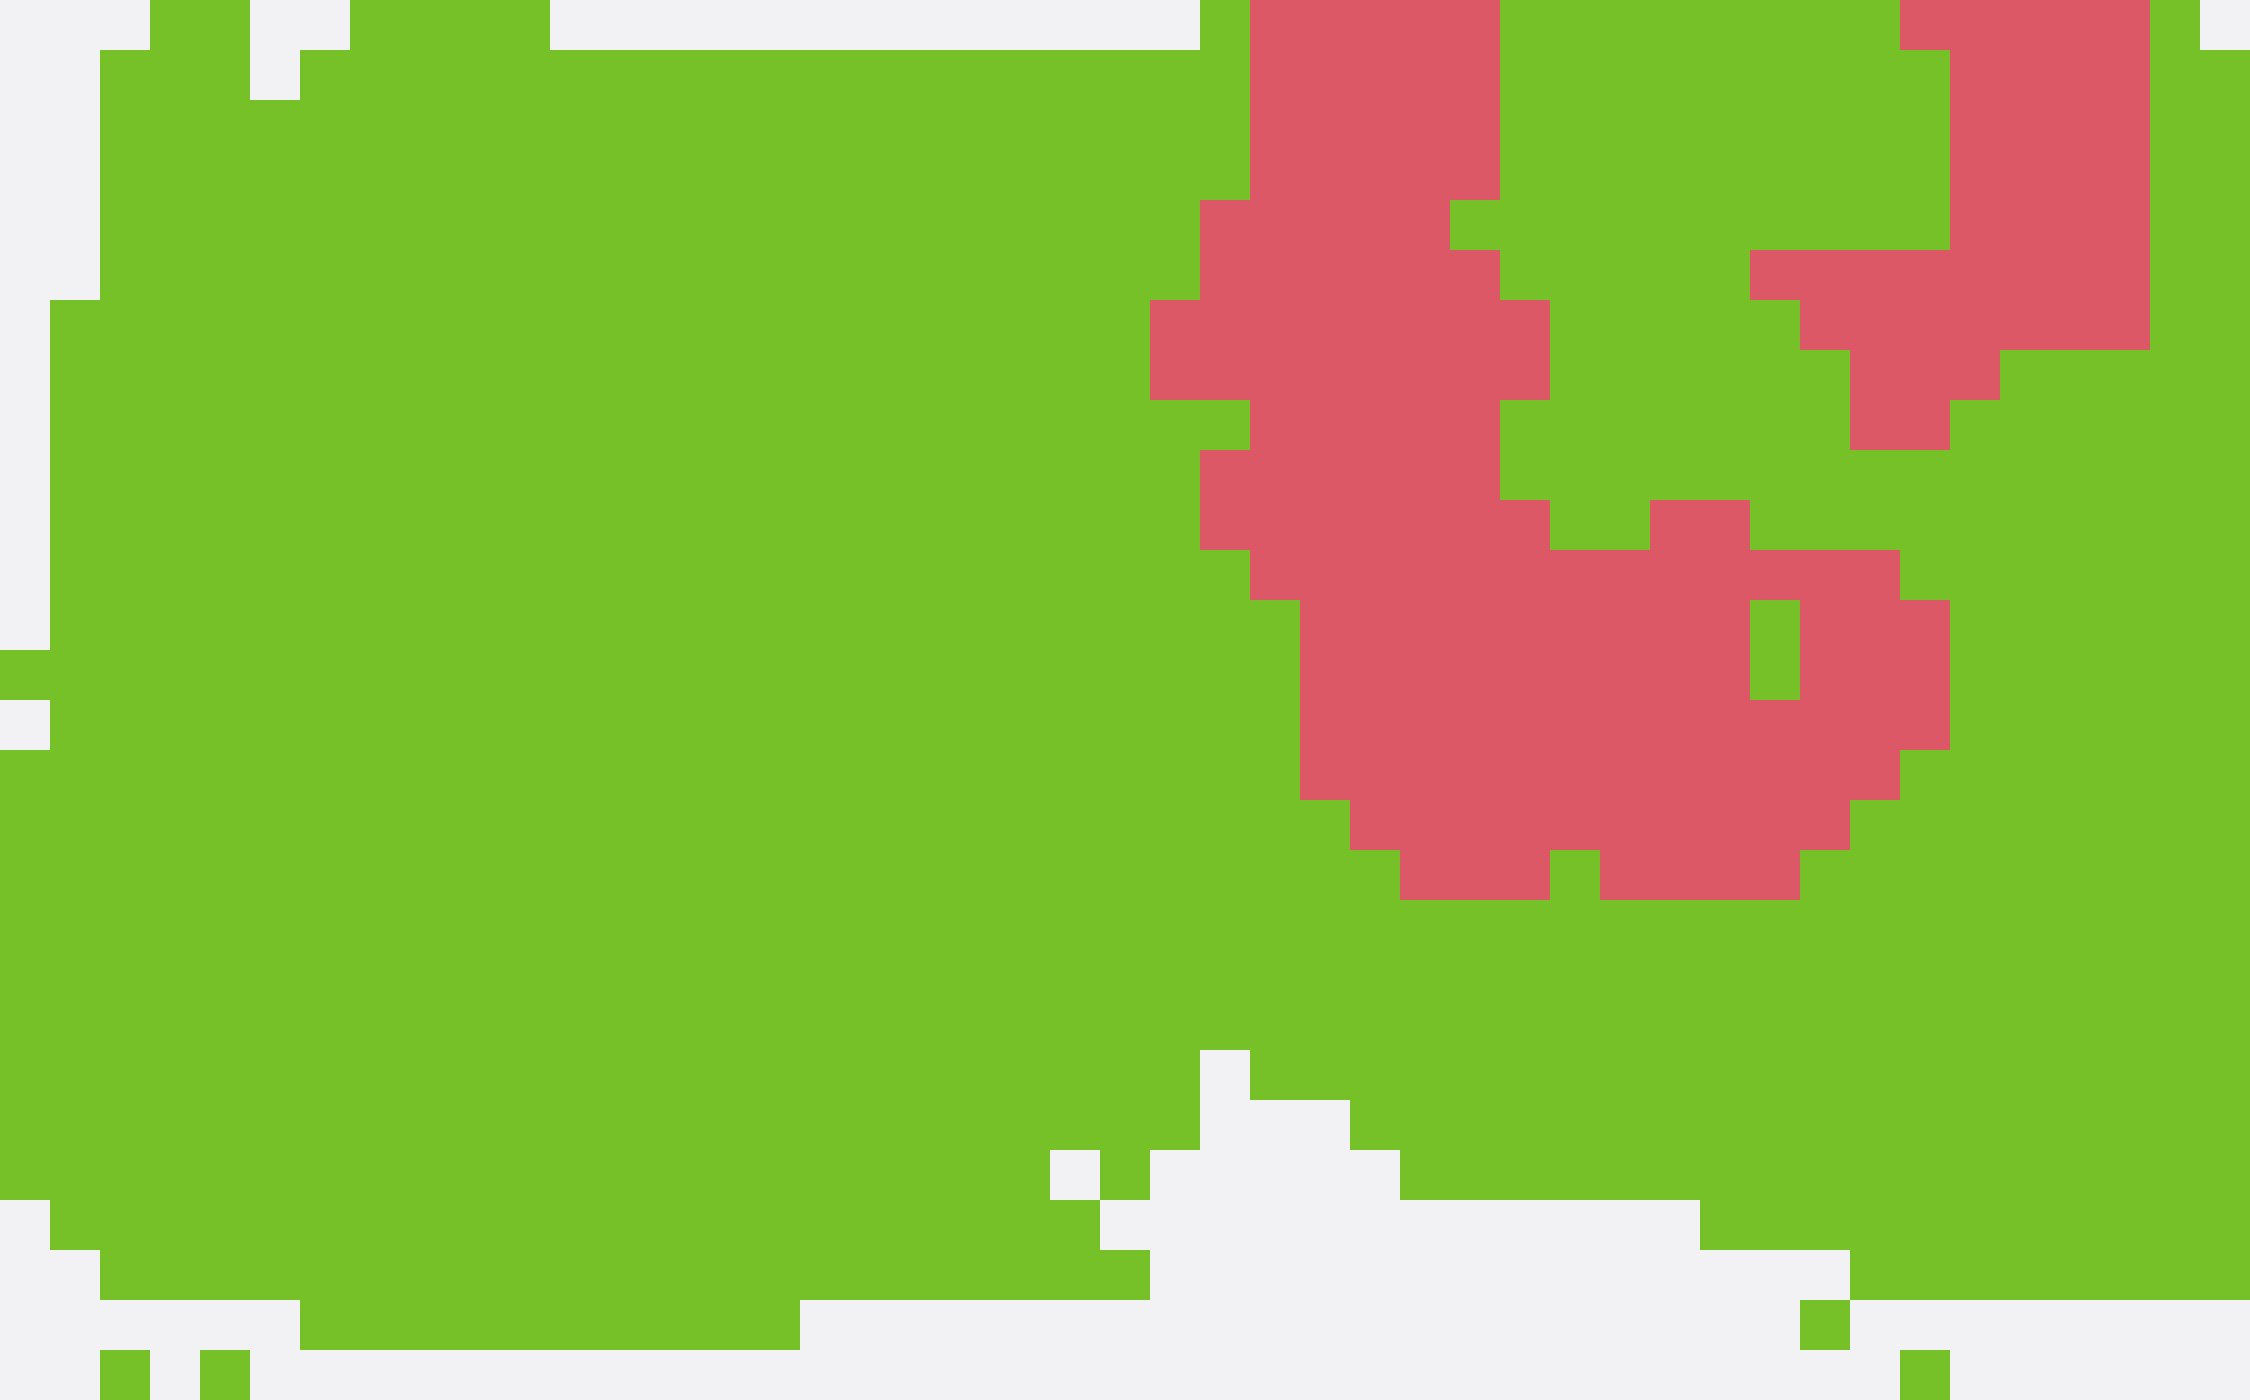

In [26]:
# Look at one slide to make sure the code is working
concat('9037')

In [112]:
# making a for loop to peice together all whole slides and save them to a .jpg 
for slide in whole_slide_numbers:

    concat(slide).save('./images/'+slide+'.jpg')

In [16]:
img_pos = Image.new('RGB',(50,50),color='#dd5866')

img_neg = Image.new('RGB',(50,50),color="#77c128")

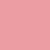

In [30]:
img_pos

In [14]:
file = os.path.basename(data[0])

In [17]:
file.split('_')[-1].replace('.png','')

'class0'

In [6]:
def class_mapping(data):
    # Separating file name from the path of the file
    files = []
    for datum in data:
            files.append(os.path.basename(datum))

    # removing the .png from the file names and isolating the x, y positions of the images
    x = []
    y = []
    for file in files:
        # isolating the x and y coordinates of the image and converting to int type
        x.append(int(file.split('_')[2].replace('x','')))
        y.append(int(file.split('_')[3].replace('y','')))

    # Initialize the full image space
    full_slide = Image.new('RGB',(max(x)-min(x),max(y)-min(y)),color='#f2f2f5')

    for datum in data:
        # Isolate the file name
        file = os.path.basename(datum)

        # grab the location of the image from the file
        x = int(file.split('_')[2].replace('x',''))
        y = int(file.split('_')[3].replace('y',''))
        case = file.split('_')[-1].replace('.png','')
        # paste the image into the image space
        if case == 'class0':
            full_slide.paste(img_neg,(x-51,y-51))
        else:
            full_slide.paste(img_pos,(x-51,y-51))
    return full_slide

In [7]:
data = glob('./data/IDC_regular_ps50_idx5/10292/**/*.png', recursive=True)
class_mapping(data)

ValueError: cannot determine region size; use 4-item box